In [2]:
import pandas as pd
import numpy as np

In [3]:

hospedagens = pd.read_csv('resultado.csv', decimal=".")

In [56]:
hospedagens.head(5)

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao
0,Veja o mar no silêncio do centro! Hospede-se n...,Recife,428,2025-01-01,2025-01-08,0.2,2.5,8.3,2024-5-16
1,Hotel Dan Inn Mar Piedade - Grande Recife,Recife,2101,2025-01-01,2025-01-08,13.7,0.0,7.8,2024-5-16
2,Villa d'Oro Hotel,Recife,2136,2025-01-01,2025-01-08,1.4,2.9,8.6,2024-5-16
3,Lindo APT Cinza à 50m do mar - Praia de Boa Vi...,Recife,1017,2025-01-01,2025-01-08,5.8,NaN,10.0,2024-5-16
4,Aconchegante Apto de 1qt a 60mts do Consulado EUA,Recife,1011,2025-01-01,2025-01-08,1.2,NaN,9.7,2024-5-16


In [57]:
# printando quantas linhas de cada coluna está faltante
print(hospedagens.isnull().sum())

Hotel              0
Cidade             0
Preço              0
Checkin            0
Checkout           0
Dist_centro        0
Dist_praia       300
Avaliacao        237
Data_extracao      0
dtype: int64


<Axes: >

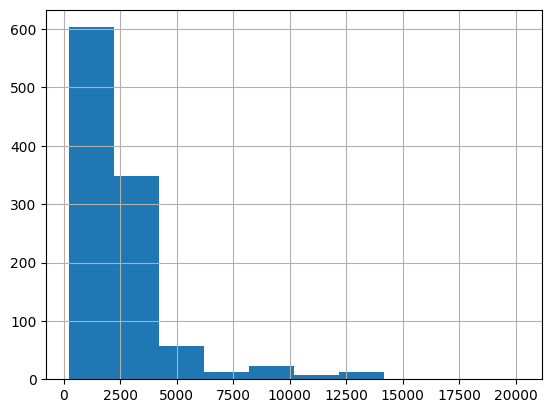

In [58]:
# histograma do preço das hospedagens
hospedagens["preço"].hist()

<Axes: >

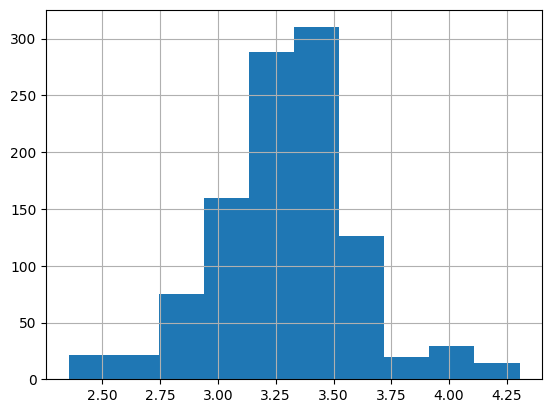

In [59]:
hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)
hospedagens[hospedagens['log_price'] > 0]['log_price'].hist()

In [8]:
# calculando a média
hospedagens[(hospedagens["preço"] < 350) & (hospedagens['checkin'] == '2025-01-01')]

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao
12,Oxen Hostel 2024,Recife,226,2025-01-01,2025-01-08,0.45,NaN,6.0,2024-5-16
17,Lê'Frevo Pernambucano Hostel,Recife,298,2025-01-01,2025-01-08,0.60,3.0,7.5,2024-5-16
55,Hostel Brasil Recife,Recife,347,2025-01-01,2025-01-08,7.50,NaN,9.0,2024-5-16
57,Pousada Solar do Lazer,Recife,268,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16
112,Hostel solar do lazer,Recife,274,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16
115,Pousada Solar do Lazer,Recife,274,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16


In [61]:
# calculando a mediana
hospedagens["preço"].median()

2079.0

In [62]:
hospedagens["preço"].std()

2222.4707956591715

In [63]:
hospedagens["preço"].describe()

count     1064.000000
mean      2550.731203
std       2222.470796
min        226.000000
25%       1338.250000
50%       2079.000000
75%       2772.000000
max      20173.000000
Name: Preço, dtype: float64

<Axes: >

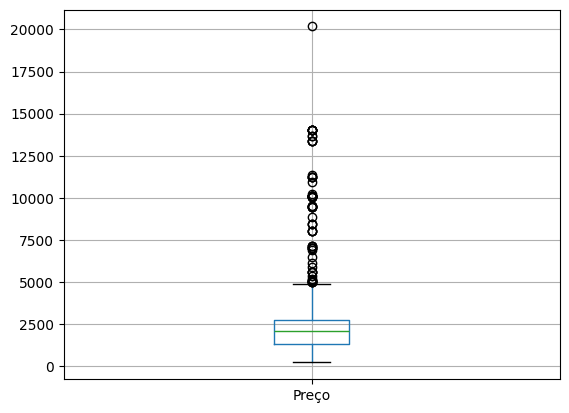

In [64]:
hospedagens.boxplot(column=['preço'])

In [65]:
hospedagens["dist_centro"].min()

0.2

In [66]:
# média de preços por checkin
hospedagens_groupby = hospedagens.groupby("checkin")
hospedagens_groupby = hospedagens_groupby["preço"].mean()
print(hospedagens_groupby)

Checkin
2025-01-01    2876.182741
2025-01-08    2492.284722
2025-01-15    2468.989691
2025-01-22    2469.152778
Name: Preço, dtype: float64
